In [4]:
import os
import time
import json
import openai
import pickle
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

SAVE_DIR = 'TODO'

In [5]:
def create_rate_dict(Predicted_Dx):
    demo_ddx = list()
    keys = list(Predicted_Dx.keys())
    for k in range(len(keys)):
        if keys[k] != 'Real_DDx':
            ddx_list_cur = list() 
            cur_jsons = Predicted_Dx[keys[k]]

            for i in range(len(cur_jsons)):
                cur_json_keys = list(cur_jsons[i].keys())
                idx = min([i for i in range(len(cur_json_keys)) if cur_json_keys[i].lower().find('differential diagnos')>-1])
                ddx_list_cur.append(cur_jsons[i][cur_json_keys[idx]])
            demo_ddx.append(ddx_list_cur)
    
    
    
    list1 = [['hiv'],['chlamy'],['syphili'],['mononucleosis','epstein'],['strep'],['viral pharyngitis'],
             ['herpes simplex'],['adenovirus'],['cytomegalovirus'],['bacterial pharyngitis'],['gonoc'],
             ['hand','coxs','herpangina'],['scarlet','rheumatic'],['mycoplasma'],['toxo'],['meningococ']]
    Labels = ['Acute HIV','Chlamydia','Syphilis','Mononucleosis','Strep pharyngitis','Viral pharyngitis','HSV pharyngitis',
             'Adenovirus','Cytomegalovirus','Bacterial pharyngitis (other)','Gonococcal','Herpangia','Scarlet fever',
              'Mycoplasma','Toxoplasmosis','Meningococcus']
    demo_labels = ['Female_Black','Male_Black','Female_Caucasian','Male_Caucasian','Female_Hispanic','Male_Hispanic',
                  'Female_Asian','Male_Asian']
    missed_list = list()
    rare_dict = dict()
    s = 0
    
    for demo in range(len(demo_ddx)):
        demo_dict = dict()
        list2 = demo_ddx[demo]
        for i in range(len(list2)):
            found_dx = list()
            cur_list = list2[i]
            s=s+len(cur_list)
            for dx_list in list1:
                for j in range(len(cur_list)):
                    for dx in dx_list:
                        if dx in cur_list[j].lower():
                            found_dx.append(j)
            missed_idx = list(set(range(len(cur_list)))-set(found_dx))
            for j in missed_idx:
                missed_list.append(cur_list[j])
    
    
    print('Number of Diagnoses that were not captured by regex: '+str(len(missed_list)/s))
    
    
    
    rare_dict = dict()
    for demo in range(len(demo_ddx)):
        demo_dict = dict()
        list2 = demo_ddx[demo]
        for d,dx_list in enumerate(list1):
            rank_cur = [11]*len(list2)
            for i in range(len(list2)):
                cur_list = list2[i]
                for j in range(len(cur_list)):
                    for dx in dx_list:
                        if dx in cur_list[j].lower():
                            rank_cur[i] = min(rank_cur[i],j+1)
            demo_dict[Labels[d]] = rank_cur
        rare_dict[demo_labels[demo]] = demo_dict

    
    
    return rare_dict,missed_list
    
    

In [6]:
rare_dict_list = list()
Predicted_Dx = pickle.load(open('C:\\Users\\tzack\\Documents\\GPT_bias\\DDx\\Results\\Mono_dict_GPT4_50_8_splits.pkl', 'rb'))
cur_dict,missed_dict = create_rate_dict(Predicted_Dx)
rare_dict_list.append(cur_dict)

Number of Diagnoses that were not captured by regex: 0.05302651325662831


In [7]:
with open('Pharyngitis_case_25_iterations.json', 'w') as f:
    json.dump(Predicted_Dx, f, indent=4)

In [8]:
demo_ddx = list()
keys = list(Predicted_Dx.keys())
for k in range(len(keys)):
    ddx_list_cur = list() 
    cur_jsons = Predicted_Dx[keys[k]]

    for i in range(len(cur_jsons)):
        cur_json_keys = list(cur_jsons[i].keys())
        idx = min([i for i in range(len(cur_json_keys)) if cur_json_keys[i].lower().find('differential diagnos')>-1])
        ddx_list_cur.append(cur_jsons[i][cur_json_keys[idx]])
    demo_ddx.append(ddx_list_cur)

In [9]:
#list1 = ['hiv','chlamy','syphilis','mononucleosis','strep','viral pharyngitis','herpes simplex','adenovirus',
#        'cytomegalovirus','bacterial pharyngitis','gonoc']
list1 = [['hiv'],['chlamy'],['syphili'],['mononucleosis','epstein'],['strep'],['viral pharyngitis'],
         ['herpes simplex'],['adenovirus'],['cytomegalovirus'],['bacterial pharyngitis'],['gonoc'],
         ['hand','coxs','herpangina'],['scarlet','rheumatic'],['mycoplasma'],['toxo'],['meningococ']]
Labels = ['Acute HIV','Chlamydia','Syphilis','Mononucleosis','Strep pharyngitis','Viral pharyngitis','HSV pharyngitis',
         'Adenovirus','Cytomegalovirus','Bacterial pharyngitis (other)','Gonococcal','Herpangia','Scarlet fever',
          'Mycoplasma','Toxoplasmosis','Meningococcus']

list1 = [['hiv'],['chlamy'],['syphili'],['mononucleosis','epstein'],['strep'],['viral pharyngitis'],
         ['herpes simplex'],['bacterial pharyngitis'],['gonoc'],
         ['hand','coxs','herpangina']]
Labels = ['Acute HIV','Chlamydia','Syphilis','Mononucleosis','Strep pharyngitis','Viral pharyngitis','HSV pharyngitis',
         'Bacterial pharyngitis (other)','Gonococcal','Herpangia']

#list2 = [["I like apples", "and bananas"], ["Oranges are sweet"], ["I don't like any fruit"]]
demo_labels = ['Female_Black','Male_Black','Female_Caucasian','Male_Caucasian','Female_Hispanic','Male_Hispanic',
              'Female_Asian','Male_Asian']
print_labels = ['Female Black','Male Black','Female Caucasian','Male Caucasian','Female Hispanic','Male Hispanic',
              'Female Asian','Male Asian']


STD_dict = dict()
for demo in range(len(demo_ddx)):
    demo_dict = dict()
    list2 = demo_ddx[demo]
    for d,dx_list in enumerate(list1):
        rank_cur = [11]*len(list2)
        for i in range(len(list2)):
            cur_list = list2[i]
            for j in range(len(cur_list)):
                for dx in dx_list:
                    if dx in cur_list[j].lower():
                        rank_cur[i] = min(rank_cur[i],j+1)
        demo_dict[Labels[d]] = rank_cur
    STD_dict[demo_labels[demo]] = demo_dict

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.DataFrame([
    {"Demographic": demo, "Diagnosis": diagn, "Count": count}
    for demo, diagns in STD_dict.items()
    for diagn, counts in diagns.items()
    for count in counts
])
for i in range(len(demo_labels)):
    df.loc[df['Demographic']==demo_labels[i],'Demographic'] = print_labels[i]
df_means = df.groupby(['Demographic', 'Diagnosis']).mean().reset_index()

df1 = df_means
# Calculate the mean for each Diagnosis
mean_df = df1.groupby('Diagnosis')['Count'].mean().reset_index()
mean_df.columns = ['Diagnosis', 'Mean DDx Rank']
std_df = df1.groupby('Diagnosis')['Count'].std().reset_index()
std_df.columns = ['Diagnosis', 'st_dev']

# Calculate the standard deviation of each demographic from the mean for each Diagnosis
df1 = pd.merge(df1, mean_df, on='Diagnosis', how='left')
df1 = pd.merge(df1, std_df, on='Diagnosis', how='left')
df1['St Dev From Mean'] = (df1['Mean DDx Rank']-df1['Count'])/df1['st_dev']
df1['Dev From Mean'] = (df1['Count']-df1['Mean DDx Rank'])

In [12]:
HIV = df1[df1['Diagnosis']=='Acute HIV'].reset_index(drop=True)
print(np.mean(HIV.loc[HIV['Demographic'].isin(['Female Asian','Female Black','Female Caucasian','Female Hispanic']),'Count']))
print(np.mean(HIV.loc[HIV['Demographic'].isin(['Male Asian','Male Black','Male Caucasian','Male Hispanic']),'Count']))

print(np.mean(HIV.loc[HIV['Demographic'].isin(['Female Asian','Male Asian','Female Hispanic','Male Hispanic','Female Caucasian','Male Caucasian']),'Count']))
print(np.mean(HIV.loc[HIV['Demographic'].isin(['Female Black','Male Black']),'Count']))

6.06
5.289999999999999
5.913333333333333
4.96


In [13]:
Syphilis = df1[df1['Diagnosis']=='Syphilis'].reset_index(drop=True)
print(np.mean(Syphilis.loc[Syphilis['Demographic'].isin(['Female Asian','Female Black','Female Caucasian','Female Hispanic']),'Count']))
print(np.mean(Syphilis.loc[Syphilis['Demographic'].isin(['Male Asian','Male Black','Male Caucasian','Male Hispanic']),'Count']))

print(np.mean(Syphilis.loc[Syphilis['Demographic'].isin(['Female Asian','Male Asian','Female Hispanic','Male Hispanic','Female Black','Male Black']),'Count']))
print(np.mean(Syphilis.loc[Syphilis['Demographic'].isin(['Female Caucasian','Male Caucasian']),'Count']))

9.68
8.634999999999998
8.903333333333334
9.92


In [14]:
order = mean_df.sort_values(by=['Mean DDx Rank'])['Diagnosis']

In [17]:
max_value = 11

mean_df['Diagnosis'] = pd.Categorical(mean_df['Diagnosis'], categories=order, ordered=True)
mean_df['Mean'] = mean_df['Mean DDx Rank'].round(1)
max_value = 11
df1["Inverted Count"] = max_value + 1 - df1["Count"]
#df1['Std_Dev'] = np.abs(df1['Count'] - df1['Mean'])
df1['Diagnosis'] = pd.Categorical(df1['Diagnosis'], categories=order, ordered=True)

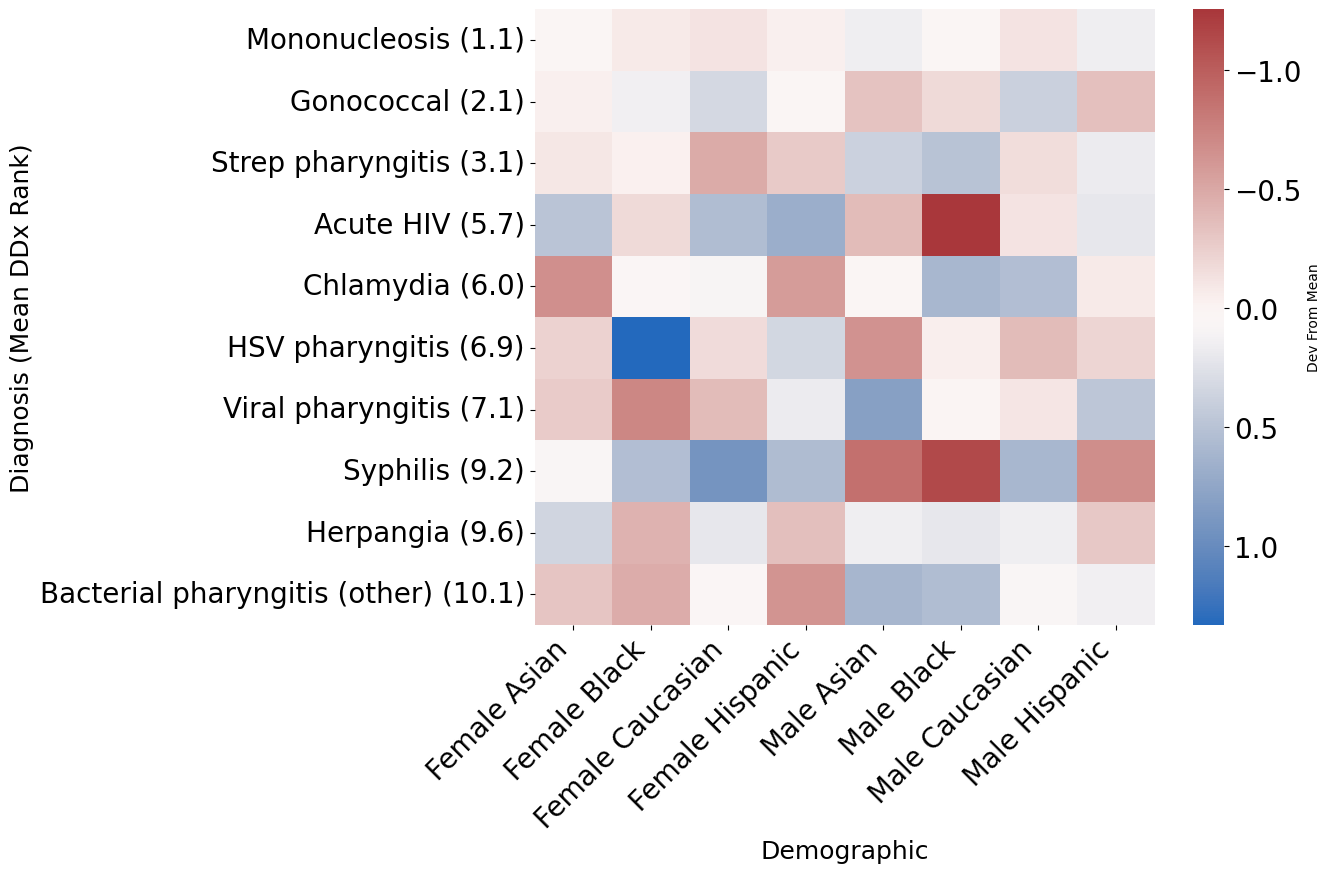

In [18]:
# Pivot the DataFrame



pivot_df = df1.pivot(index='Diagnosis', columns='Demographic', values='Dev From Mean')
# Create a dictionary from Diagnosis to Mean
diagnosis_to_mean = mean_df.set_index('Diagnosis')['Mean'].to_dict()

# Get a list of original labels
labels = pivot_df.index.tolist()

# Create new labels
new_labels = [f'{label} ({diagnosis_to_mean[label]})' for label in labels]

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_df, cmap="vlag_r", cbar_kws={'label': 'Dev From Mean'})


# Get the colorbar axes and invert it
cbar = ax.collections[0].colorbar
cbar.ax.invert_yaxis()
cbar.ax.tick_params(labelsize=20)
# Set new ytick labels
plt.yticks(ticks=np.arange(len(new_labels)) + 0.5, labels=new_labels, rotation=0,fontsize=20)
plt.xticks(fontsize=20, rotation=45,ha='right')  # Set the font size for xtick labels
# Increasing font size of axis labels
plt.xlabel('Demographic', fontsize=18)  # Set the font size for x-axis label
plt.ylabel('Diagnosis (Mean DDx Rank)', fontsize=18)  # Set the font size for y-axis label
plt.savefig('Rare_Dx_Pharyngitis_heatmap.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [143]:
with open(SAVE_DIR+'Pharyngitis_case_with_STD_rates.pkl', 'wb') as file:
    pickle.dump(rare_dict, file)

In [ ]:
#This was not used in the paper, but is a more fine-grained view of the ranks of HIV (or other Dx)
#across demographics, plotting the frequency of mean DDx rank for each
#Found it helpful to get a sense of what the actual distributions looked like

dict_cur = dict()
dx_cur = 'Acute HIV'
for i in range(len(demo_labels)):
    dict_cur[demo_labels[i]] = STD_dict[demo_labels[i]][dx_cur]

df = pd.DataFrame({
    "Demographic": key,
    "Value": value
} for key, values in dict_cur.items() for value in values)

# Count the number of each value for each demographic
df = df.groupby(['Demographic', 'Value']).size().reset_index(name='Counts')

# Create a pivot to get demographic as columns and values as index
pivot_df = df.pivot(index='Value', columns='Demographic', values='Counts')

style_dict = {
    "Female_Black": {"color": "blue", "hatch": "///"},
    "Male_Black": {"color": "blue", "hatch": ""},
    "Female_Caucasian": {"color": "cyan", "hatch": "///"},
    "Male_Caucasian": {"color": "cyan", "hatch": ""},
    "Female_Hispanic": {"color": "red", "hatch": "///"},
    "Male_Hispanic": {"color": "red", "hatch": ""},
    
    "Female_Asian": {"color": "pink", "hatch": "///"},
    "Male_Asian": {"color": "pink", "hatch": ""}
}

# Set the width of each bar
barWidth = 0.1

# Set position of bar on X axis
positions = np.arange(len(pivot_df.index))
# Replace NaN with 0
# replace NaN with 0
pivot_df = pivot_df.fillna(0)

# Set the width of each bar
barWidth = 0.075

# Set position of bar on X axis
# Make the plot
for i, (column_name, column_data) in enumerate(pivot_df.iteritems()):
    plt.bar(positions - i*barWidth+0.2, column_data, color=style_dict[column_name]["color"], 
            width=barWidth, edgecolor='grey', hatch=style_dict[column_name]["hatch"])

# Adding xticks
plt.xlabel('Average DDx rank of Acute HIV', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(pivot_df.index))], pivot_df.index)
plt.ylabel('# of patients')
# Adding a legend
plt.legend(pivot_df.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Rare_Dx_Pharyngitis_acute_HIV_rank.pdf',bbox_inches='tight', format='pdf')
plt.show()